<h1>Analysis of sensor variation </h1>
<p>This notebook examines the noise associated with the MaxBotix LV-MaxSonar EZ0 Ultrasonic Rangefinder to assess the suitability for Kalman Filtering. The data was obtained during an experiment where obstacles were placed at 10 cm intervals away from the sensor<p>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [7]:
readings_df = pd.read_csv("MaxBotixEZ0_Readings.csv")
readings_df.head()

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,15,12,20,27,35,87,36,16,56,56,86,89,97,86,104,67,115
1,15,14,26,46,36,42,51,62,56,74,35,88,94,67,116,100,101
2,17,14,20,31,16,45,47,57,65,79,79,84,87,88,75,105,94
3,31,21,21,30,36,55,24,60,70,48,87,90,96,92,36,79,79
4,16,14,22,24,28,44,52,58,63,47,80,88,80,69,114,106,85


In [8]:
readings_df.describe()

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,15.56000,14.120000,19.10000,27.800000,35.880000,44.970000,50.840000,57.970000,63.980000,70.260000,76.720000,78.240000,81.060000,84.250000,86.040000,85.470000,85.55000
std,7.54424,5.821035,8.16311,8.615232,8.424687,9.154626,10.665454,9.017889,12.023529,14.235835,13.084095,16.786912,15.155637,17.792505,19.508051,21.496279,20.59782
min,0.00000,0.000000,0.00000,0.000000,12.000000,15.000000,8.000000,16.000000,0.000000,8.000000,35.000000,16.000000,32.000000,31.000000,32.000000,23.000000,32.00000
25%,15.00000,13.000000,19.00000,27.000000,35.000000,43.000000,50.000000,58.000000,63.750000,63.750000,73.000000,73.000000,77.000000,74.000000,75.000000,79.000000,79.00000
50%,16.00000,14.000000,20.00000,28.000000,36.000000,44.000000,51.000000,59.000000,67.000000,74.000000,80.000000,82.000000,83.000000,85.500000,83.500000,86.000000,85.00000
75%,17.00000,15.000000,21.00000,30.000000,38.000000,47.000000,53.000000,61.000000,69.000000,76.250000,82.000000,88.000000,90.250000,97.000000,101.250000,99.250000,99.25000
max,38.00000,38.000000,47.00000,63.000000,63.000000,87.000000,79.000000,87.000000,91.000000,99.000000,107.000000,123.000000,111.000000,113.000000,123.000000,131.000000,133.00000


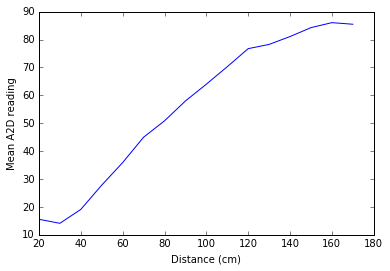

In [34]:
# plot of mean reading against distance to gain an idea of the relationship between 
distances = range(20,180,10)
# mean readings for each column
mean_readings = pd.DataFrame.mean(readings_df, axis=0)
plt.plot(distances, mean_readings[:-1])
plt.xlabel('Distance (cm)')
plt.ylabel('Mean A2D reading')


<h2>Relationship between A2D and Distance</h2>
<p>The relationship appears to be linear for a large part of the graph between 30 and 110 cm as expected, but surprisingly the readings after this point begin to plateau despite changes in distance. This could be due to false readings from the hallway as the wave is very wide at that point in time</p>

In [31]:
# Converting readings to distances
def convert_to_cm(reading):
    # manufacturer states the reading / 2 gives the distance in inches. Multiply by 2.54 to get cm
    return reading/2 * 2.54

distance_readings_df = pd.DataFrame.copy(readings_df)

for i in distance_readings_df:
    distance_readings_df[i] = distance_readings_df[i].map(convert_to_cm)
    
distance_readings_df.head()

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,17.78,15.24,25.40,33.02,43.18,109.22,45.72,20.32,71.12,71.12,109.22,111.76,121.92,109.22,132.08,83.82,144.78
1,17.78,17.78,33.02,58.42,45.72,53.34,63.50,78.74,71.12,93.98,43.18,111.76,119.38,83.82,147.32,127.00,127.00
2,20.32,17.78,25.40,38.10,20.32,55.88,58.42,71.12,81.28,99.06,99.06,106.68,109.22,111.76,93.98,132.08,119.38
3,38.10,25.40,25.40,38.10,45.72,68.58,30.48,76.20,88.90,60.96,109.22,114.30,121.92,116.84,45.72,99.06,99.06
4,20.32,17.78,27.94,30.48,35.56,55.88,66.04,73.66,78.74,58.42,101.60,111.76,101.60,86.36,144.78,134.62,106.68


In [32]:
# summary stats for distance readings
distance_readings_df.describe()

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000
mean,19.126200,17.22120,23.622000,34.645600,44.958000,56.413400,63.804800,72.974200,80.645000,88.544400,96.824800,98.806000,102.2350,106.248200,108.661200,107.797600,107.950000
std,9.438133,7.20757,10.092427,10.773404,10.460236,11.509091,13.344459,11.277784,15.086895,17.873292,16.466148,21.289462,19.2135,22.583388,24.712279,27.304943,26.132204
min,0.000000,0.00000,0.000000,0.000000,15.240000,17.780000,10.160000,20.320000,0.000000,10.160000,43.180000,20.320000,40.6400,38.100000,40.640000,27.940000,40.640000
25%,17.780000,15.24000,22.860000,33.020000,43.180000,53.340000,63.500000,73.660000,80.645000,80.645000,91.440000,91.440000,96.5200,93.980000,93.980000,99.060000,99.060000
50%,20.320000,17.78000,25.400000,35.560000,45.720000,55.880000,63.500000,73.660000,83.820000,93.980000,101.600000,104.140000,104.1400,107.950000,105.410000,109.220000,106.680000
75%,20.320000,17.78000,25.400000,38.100000,48.260000,58.420000,66.040000,76.200000,86.360000,96.520000,104.140000,111.760000,114.3000,121.920000,127.635000,125.095000,125.095000
max,48.260000,48.26000,58.420000,78.740000,78.740000,109.220000,99.060000,109.220000,114.300000,124.460000,134.620000,154.940000,139.7000,142.240000,154.940000,165.100000,167.640000


In [40]:
# calculate noise by subtracting value of true distance (denoted by column headings)
noise_df = pd.DataFrame.copy(distance_readings_df)
true_distances = range(10,180,10)

for i in true_distances:
    index = str(i)
    noise_df[index] = np.array(noise_df[index] - i)

noise_df.head()
    


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,7.78,-4.76,-4.60,-6.98,-6.82,49.22,-24.28,-59.68,-18.88,-28.88,-0.78,-8.24,-8.08,-30.78,-17.92,-76.18,-25.22
1,7.78,-2.22,3.02,18.42,-4.28,-6.66,-6.50,-1.26,-18.88,-6.02,-66.82,-8.24,-10.62,-56.18,-2.68,-33.00,-43.00
2,10.32,-2.22,-4.60,-1.90,-29.68,-4.12,-11.58,-8.88,-8.72,-0.94,-10.94,-13.32,-20.78,-28.24,-56.02,-27.92,-50.62
3,28.10,5.40,-4.60,-1.90,-4.28,8.58,-39.52,-3.80,-1.10,-39.04,-0.78,-5.70,-8.08,-23.16,-104.28,-60.94,-70.94
4,10.32,-2.22,-2.06,-9.52,-14.44,-4.12,-3.96,-6.34,-11.26,-41.58,-8.40,-8.24,-28.40,-53.64,-5.22,-25.38,-63.32


In [42]:
# summary stats for noise df
noise_df.describe()

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000
mean,9.126200,-2.77880,-6.378000,-5.354400,-5.042000,-3.586600,-6.195200,-7.025800,-9.355000,-11.455600,-13.175200,-21.194000,-27.7650,-33.751800,-41.338800,-52.202400,-62.050000
std,9.438133,7.20757,10.092427,10.773404,10.460236,11.509091,13.344459,11.277784,15.086895,17.873292,16.466148,21.289462,19.2135,22.583388,24.712279,27.304943,26.132204
min,-10.000000,-20.00000,-30.000000,-40.000000,-34.760000,-42.220000,-59.840000,-59.680000,-90.000000,-89.840000,-66.820000,-99.680000,-89.3600,-101.900000,-109.360000,-132.060000,-129.360000
25%,7.780000,-4.76000,-7.140000,-6.980000,-6.820000,-6.660000,-6.500000,-6.340000,-9.355000,-19.355000,-18.560000,-28.560000,-33.4800,-46.020000,-56.020000,-60.940000,-70.940000
50%,10.320000,-2.22000,-4.600000,-4.440000,-4.280000,-4.120000,-6.500000,-6.340000,-6.180000,-6.020000,-8.400000,-15.860000,-25.8600,-32.050000,-44.590000,-50.780000,-63.320000
75%,10.320000,-2.22000,-4.600000,-1.900000,-1.740000,-1.580000,-3.960000,-3.800000,-3.640000,-3.480000,-5.860000,-8.240000,-15.7000,-18.080000,-22.365000,-34.905000,-44.905000
max,38.260000,28.26000,28.420000,38.740000,28.740000,49.220000,29.060000,29.220000,24.300000,24.460000,24.620000,34.940000,9.7000,2.240000,4.940000,5.100000,-2.360000


In [58]:
# get overall noise
distances = range(20,180,10)
indexes = [str(i) for i in distances ]
overall_noise = pd.Series([])

for i in indexes:
    overall_noise = overall_noise.append(noise_df[i]).reset_index(drop=True)
    
overall_noise


0        -4.76
1        -2.22
2        -2.22
3         5.40
4        -2.22
5        -4.76
6        -2.22
7        -2.22
8        -2.22
9         0.32
10        2.86
11       -2.22
12        0.32
13       -4.76
14       -4.76
15       -4.76
16       -4.76
17       -9.84
18       -4.76
19       -2.22
20      -20.00
21       -4.76
22      -20.00
23       -2.22
24       28.26
25       -2.22
26       -9.84
27        0.32
28       -2.22
29       -9.84
         ...  
1570    -50.62
1571    -50.62
1572   -101.42
1573    -45.54
1574    -50.62
1575    -40.46
1576   -109.04
1577     -9.98
1578    -63.32
1579    -50.62
1580   -109.04
1581    -65.86
1582    -30.30
1583    -70.94
1584   -106.50
1585    -22.68
1586    -63.32
1587    -70.94
1588   -129.36
1589    -78.56
1590    -60.78
1591    -68.40
1592    -60.78
1593    -70.94
1594    -58.24
1595    -65.86
1596    -45.54
1597    -76.02
1598    -22.68
1599    -63.32
dtype: float64

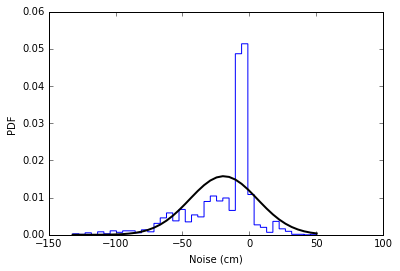

In [67]:
xs = np.linspace(overall_noise.min(), overall_noise.max() + 1, num=40)
overall_noise_plt = plt.hist(overall_noise, normed=True, bins = xs, histtype='step')
plt.xlabel('Noise (cm)')
plt.ylabel('PDF')

norm = stats.norm(overall_noise.mean(), overall_noise.std())
plt.plot(xs, norm.pdf(xs), color='k', lw=2)
